## Table of Contents
[Importing libraries](#scrollTo=X0eHp0u1mTFO)

[Checking for null values](#scrollTo=9jgo6Nxi5o8k)

[Handling null values](#scrollTo=XqIeAzHhREOX)

[Conversion to appropriate to data types](#scrollTo=Ko6ijQ_dhlVc)

[Feature Engineering](#scrollTo=KbxCFmimmYoR)

[Visualization](#scrollTo=yKzZ8X1aFHBd)

[Detecting and Handling Outliers(Unsupervised)](#scrollTo=dlpTeIEECo2x)

[Graphical and Non Graphical Analysis](#scrollTo=s60Cq815CyTa)

[Categorical variables encoding(OHE)](#scrollTo=CGVJTdZvVVHp)

[Splitting train test data](#scrollTo=hpIjCPhNbVjA)

[Target encoding for store_primary_category](#scrollTo=dpSEuUO6cMpq)

[Scaling](#scrollTo=-NqodfaqilQh)

[Modeling: Random Forest](#scrollTo=vanz1ZemwJem)

>[Check accuracy score](#scrollTo=qFfZ8WVd1RkE)

[Modeling: Neural Networks](#scrollTo=-CEQxsWr24wM)

>[Neural Network - 1 hidden layer](#scrollTo=1_IVQpeW7cTL)

>[Neural Network - 2 Hidden Layers](#scrollTo=wruX_4J0SXvl)

>[Neural Network - 3 Hidden Layers](#scrollTo=ekAHEkMeSXvn)

[Questionnaire](#scrollTo=xHZM0pp1SXvp)


## Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("dataset.csv")

In [ ]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

## Checking for null values

In [ ]:
df.isna().sum()/len(df)

market_id                   0.004999
created_at                  0.000000
actual_delivery_time        0.000035
store_id                    0.000000
store_primary_category      0.024110
order_protocol              0.005040
total_items                 0.000000
subtotal                    0.000000
num_distinct_items          0.000000
min_item_price              0.000000
max_item_price              0.000000
total_onshift_partners      0.082369
total_busy_partners         0.082369
total_outstanding_orders    0.082369
dtype: float64

## Handling null values

In [ ]:
df=df.loc[~df['actual_delivery_time'].isna()]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197421 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196434 non-null  float64
 1   created_at                197421 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197421 non-null  object 
 4   store_primary_category    192661 non-null  object 
 5   order_protocol            196426 non-null  float64
 6   total_items               197421 non-null  int64  
 7   subtotal                  197421 non-null  int64  
 8   num_distinct_items        197421 non-null  int64  
 9   min_item_price            197421 non-null  int64  
 10  max_item_price            197421 non-null  int64  
 11  total_onshift_partners    181159 non-null  float64
 12  total_busy_partners       181159 non-null  float64
 13  total_outstanding_orders  181159 non-null  f

In [ ]:
df=df.loc[(~df['total_onshift_partners'].isna()) & (~df['total_busy_partners'].isna()) & (~df['total_outstanding_orders'].isna())]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181159 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 180240 non-null  float64
 1   created_at                181159 non-null  object 
 2   actual_delivery_time      181159 non-null  object 
 3   store_id                  181159 non-null  object 
 4   store_primary_category    176944 non-null  object 
 5   order_protocol            180242 non-null  float64
 6   total_items               181159 non-null  int64  
 7   subtotal                  181159 non-null  int64  
 8   num_distinct_items        181159 non-null  int64  
 9   min_item_price            181159 non-null  int64  
 10  max_item_price            181159 non-null  int64  
 11  total_onshift_partners    181159 non-null  float64
 12  total_busy_partners       181159 non-null  float64
 13  total_outstanding_orders  181159 non-null  f

In [ ]:
df=df.loc[~df['store_primary_category'].isna()]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176944 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 176476 non-null  float64
 1   created_at                176944 non-null  object 
 2   actual_delivery_time      176944 non-null  object 
 3   store_id                  176944 non-null  object 
 4   store_primary_category    176944 non-null  object 
 5   order_protocol            176488 non-null  float64
 6   total_items               176944 non-null  int64  
 7   subtotal                  176944 non-null  int64  
 8   num_distinct_items        176944 non-null  int64  
 9   min_item_price            176944 non-null  int64  
 10  max_item_price            176944 non-null  int64  
 11  total_onshift_partners    176944 non-null  float64
 12  total_busy_partners       176944 non-null  float64
 13  total_outstanding_orders  176944 non-null  f

In [ ]:
df=df.loc[~df['market_id'].isna()]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176476 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 176476 non-null  float64
 1   created_at                176476 non-null  object 
 2   actual_delivery_time      176476 non-null  object 
 3   store_id                  176476 non-null  object 
 4   store_primary_category    176476 non-null  object 
 5   order_protocol            176248 non-null  float64
 6   total_items               176476 non-null  int64  
 7   subtotal                  176476 non-null  int64  
 8   num_distinct_items        176476 non-null  int64  
 9   min_item_price            176476 non-null  int64  
 10  max_item_price            176476 non-null  int64  
 11  total_onshift_partners    176476 non-null  float64
 12  total_busy_partners       176476 non-null  float64
 13  total_outstanding_orders  176476 non-null  f

In [ ]:
df['order_protocol'].value_counts(dropna=False)

1.0    48518
3.0    47271
5.0    41509
2.0    20958
4.0    17292
6.0      681
NaN      228
7.0       19
Name: order_protocol, dtype: int64

In [ ]:
df.loc[df['order_protocol'].isna(),['order_protocol']]=0.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176476 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 176476 non-null  float64
 1   created_at                176476 non-null  object 
 2   actual_delivery_time      176476 non-null  object 
 3   store_id                  176476 non-null  object 
 4   store_primary_category    176476 non-null  object 
 5   order_protocol            176476 non-null  float64
 6   total_items               176476 non-null  int64  
 7   subtotal                  176476 non-null  int64  
 8   num_distinct_items        176476 non-null  int64  
 9   min_item_price            176476 non-null  int64  
 10  max_item_price            176476 non-null  int64  
 11  total_onshift_partners    176476 non-null  float64
 12  total_busy_partners       176476 non-null  float64
 13  total_outstanding_orders  176476 non-null  f

## Conversion to appropriate to data types

In [ ]:
df['market_id'].value_counts()

2.0    53697
4.0    46425
1.0    37248
3.0    21145
5.0    17321
6.0      640
Name: market_id, dtype: int64

In [ ]:
df['market_id']=df['market_id'].astype('object')

In [ ]:
df[["created_at", "actual_delivery_time"]] = df[["created_at", "actual_delivery_time"]].apply(pd.to_datetime)

In [ ]:

df['order_protocol'].value_counts()

1.0    48518
3.0    47271
5.0    41509
2.0    20958
4.0    17292
6.0      681
0.0      228
7.0       19
Name: order_protocol, dtype: int64

In [ ]:
df['order_protocol']=df['order_protocol'].astype('object')

## Feature Engineering

In [ ]:
df['delivery_time_taken_mins']=((df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60).apply(np.ceil)

In [ ]:
df['weekday']=df['created_at'].dt.strftime('%A')

In [ ]:
df['hour']=df['created_at'].dt.hour

In [ ]:
df['hour']=df['hour'].astype('object')

In [ ]:
df.drop(columns=['store_id'],inplace=True)

In [ ]:
df.describe(include='all')

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time_taken_mins,weekday,hour
count,176476.0,176476,176476,176476,176476.0,176476.000000,176476.000000,176476.000000,176476.000000,176476.000000,176476.000000,176476.000000,176476.000000,176476.000000,176476,176476.0
unique,6.0,163278,160879,73,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,19.0
top,2.0,2015-02-11 19:50:43,2015-02-01 03:44:13,american,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saturday,2.0
freq,53697.0,6,5,18249,48518.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30897,32991.0
first,NaN,2015-01-21 15:22:03,2015-01-21 16:16:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2015-02-18 06:00:44,2015-02-19 22:45:31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,3.204436,2696.563992,2.674528,684.965933,1159.920669,44.908072,41.846755,58.210085,48.258052,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,2.673124,1828.893959,1.625393,519.951007,560.799371,34.531681,32.156344,52.711660,27.645537,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,2.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2.000000,1408.000000,1.000000,299.000000,799.000000,17.000000,15.000000,17.000000,36.000000,NaN,NaN


In [ ]:
df.loc[df['min_item_price']<=0,['min_item_price']]=0

In [ ]:
df['discount_coupon_applied']=0

In [ ]:
df.loc[df['min_item_price']==0,['discount_coupon_applied']]=1

In [ ]:
df['discount_coupon_applied']=df['discount_coupon_applied'].astype('object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176476 entries, 0 to 197427
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 176476 non-null  object        
 1   created_at                176476 non-null  datetime64[ns]
 2   actual_delivery_time      176476 non-null  datetime64[ns]
 3   store_primary_category    176476 non-null  object        
 4   order_protocol            176476 non-null  object        
 5   total_items               176476 non-null  int64         
 6   subtotal                  176476 non-null  int64         
 7   num_distinct_items        176476 non-null  int64         
 8   min_item_price            176476 non-null  int64         
 9   max_item_price            176476 non-null  int64         
 10  total_onshift_partners    176476 non-null  float64       
 11  total_busy_partners       176476 non-null  float64       
 12  to

In [ ]:
cols=df.columns

In [ ]:
X_cols=list(filter(lambda x:x!='delivery_time_taken_mins',cols))

In [ ]:
X_cols.append('delivery_time_taken_mins')

In [ ]:
X_cols

['market_id',
 'created_at',
 'actual_delivery_time',
 'store_primary_category',
 'order_protocol',
 'total_items',
 'subtotal',
 'num_distinct_items',
 'min_item_price',
 'max_item_price',
 'total_onshift_partners',
 'total_busy_partners',
 'total_outstanding_orders',
 'weekday',
 'hour',
 'discount_coupon_applied',
 'delivery_time_taken_mins']

In [ ]:
df=df[X_cols]

In [ ]:
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,weekday,hour,discount_coupon_applied,delivery_time_taken_mins
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,Friday,22,0,63.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,Tuesday,21,0,68.0
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,Monday,0,0,27.0
14,1.0,2015-02-12 03:36:46,2015-02-12 04:14:39,italian,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,Thursday,3,0,38.0
15,1.0,2015-01-27 02:12:36,2015-01-27 03:02:24,italian,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,Tuesday,2,0,50.0


In [ ]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'weekday', 'hour',
       'discount_coupon_applied', 'delivery_time_taken_mins'],
      dtype='object')

In [ ]:
df.describe()

,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,delivery_time_taken_mins
count,176476.000000,176476.000000,176476.000000,176476.000000,176476.000000,176476.000000,176476.000000,176476.000000,176476.000000
mean,3.204436,2696.563992,2.674528,684.968024,1159.920669,44.908072,41.846755,58.210085,48.258052
std,2.673124,1828.893959,1.625393,519.948152,560.799371,34.531681,32.156344,52.711660,27.645537
min,1.000000,0.000000,1.000000,0.000000,0.000000,-4.000000,-5.000000,-6.000000,2.000000
25%,2.000000,1408.000000,1.000000,299.000000,799.000000,17.000000,15.000000,17.000000,36.000000
50%,3.000000,2221.000000,2.000000,595.000000,1095.000000,37.000000,35.000000,41.000000,45.000000
75%,4.000000,3408.000000,3.000000,942.000000,1395.000000,65.000000,62.000000,85.000000,57.000000
max,411.000000,26800.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,6232.000000


In [ ]:
## considering data which took less than a day to deliver the order
df=df.loc[df['delivery_time_taken_mins']<=24*60]

## Visualization

In [ ]:
df1=df.select_dtypes(exclude=['datetime64[ns]'])

In [ ]:
df1.head()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,weekday,hour,discount_coupon_applied,delivery_time_taken_mins
0,1.0,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,Friday,22,0,63.0
1,2.0,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,Tuesday,21,0,68.0
8,2.0,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,Monday,0,0,27.0
14,1.0,italian,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,Thursday,3,0,38.0
15,1.0,italian,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,Tuesday,2,0,50.0


In [ ]:
df1['store_primary_category'].value_counts()

american             18249
pizza                15804
mexican              15642
burger                9945
sandwich              9059
                     ...  
african                 10
lebanese                 9
belgian                  2
chocolate                1
alcohol-plus-food        1
Name: store_primary_category, Length: 73, dtype: int64

In [ ]:
df1=pd.get_dummies(df1,columns=['store_primary_category','weekday'])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()   # I have not followed above discussion
ds_scaled = scaler.fit_transform(df1)

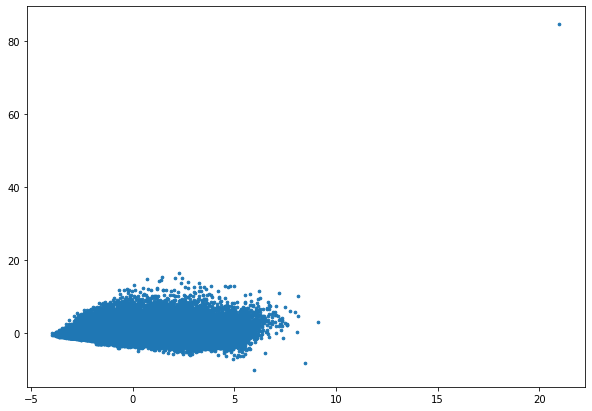

In [ ]:
from sklearn.decomposition import PCA

plt.figure(figsize=(10,7))
pca = PCA(n_components=2)
vis = pca.fit_transform(ds_scaled[:, :-1])
plt.scatter(vis[:,0], vis[:,1], s=7)

In [ ]:
# from sklearn.manifold import TSNE

# plt.figure(figsize=(10,7))
# tsne = TSNE(n_components=2, perplexity=50, random_state=0)
# vis_tsne = tsne.fit_transform(ds_scaled[:, :-1])
# plt.scatter(vis_tsne[:,0], vis_tsne[:,1], s=7)

## Detecting and Handling Outliers(Unsupervised)

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope

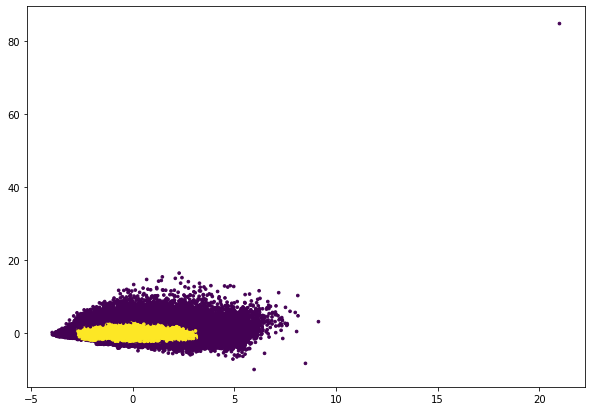

In [ ]:
plt.figure(figsize=(10,7))
is_outlier = IsolationForest(contamination = 'auto', random_state=0, n_estimators=100).fit_predict(vis)
plt.scatter(vis[:,0], vis[:,1], s=7, c=is_outlier)
plt.show()

In [ ]:
np.unique(is_outlier)

array([-1,  1])

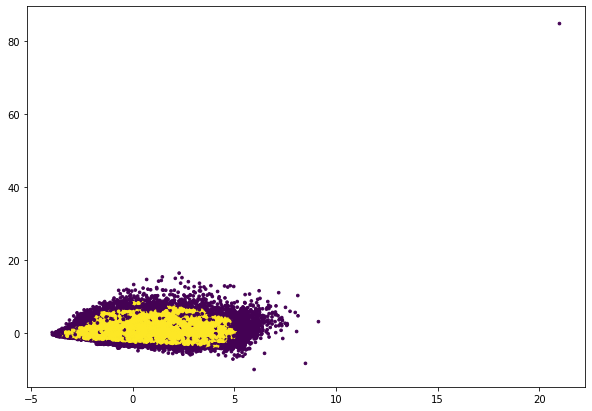

In [ ]:
plt.figure(figsize=(10,7))
is_outlier_lof = LocalOutlierFactor(n_neighbors=100, contamination=0.10).fit_predict(vis)
plt.scatter(vis[:,0], vis[:,1], s=7, c=is_outlier_lof)
plt.show()

In [ ]:
np.unique(is_outlier_lof,return_counts=True)

(array([-1,  1]), array([ 17648, 158826]))

In [ ]:
## not getting satisfied results with default parameters
from sklearn.cluster import DBSCAN
dbsc = DBSCAN().fit(vis)

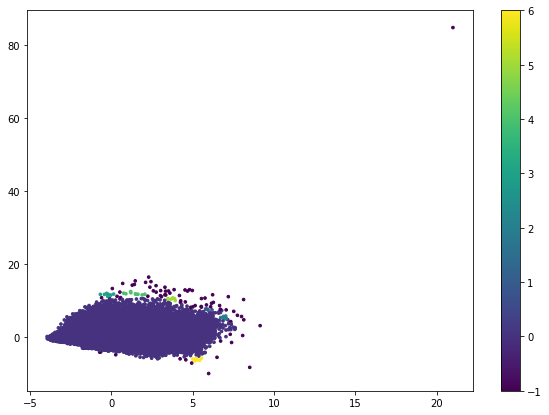

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(vis[:,0], vis[:,1], s=7, c=dbsc.labels_)
plt.colorbar()

In [ ]:
np.unique(dbsc.labels_,return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6]),
 array([    71, 176363,      5,      6,      8,      9,      6,      6]))

In [ ]:
df['is_outlier']=is_outlier_lof

In [ ]:
df['is_outlier'].value_counts()

 1    158826
-1     17648
Name: is_outlier, dtype: int64

In [ ]:
df=df.loc[df['is_outlier']==1]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158826 entries, 0 to 197427
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 158826 non-null  object        
 1   created_at                158826 non-null  datetime64[ns]
 2   actual_delivery_time      158826 non-null  datetime64[ns]
 3   store_primary_category    158826 non-null  object        
 4   order_protocol            158826 non-null  object        
 5   total_items               158826 non-null  int64         
 6   subtotal                  158826 non-null  int64         
 7   num_distinct_items        158826 non-null  int64         
 8   min_item_price            158826 non-null  int64         
 9   max_item_price            158826 non-null  int64         
 10  total_onshift_partners    158826 non-null  float64       
 11  total_busy_partners       158826 non-null  float64       
 12  to

In [ ]:
df.drop(columns=['is_outlier'],inplace=True)

## Graphical and Non Graphical Analysis

In [ ]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'weekday', 'hour',
       'discount_coupon_applied', 'delivery_time_taken_mins'],
      dtype='object')

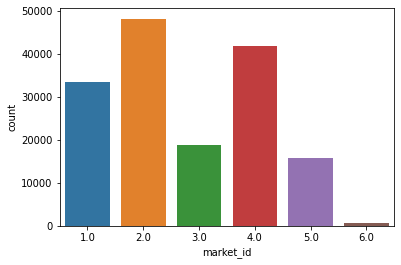

In [ ]:
## Majority of the orders are from market id 2
sns.countplot(df['market_id'])

In [ ]:
df.groupby(['store_primary_category'])['store_primary_category'].count().to_frame('Count').reset_index().sort_values(by='Count',ascending=False).head(10)

,store_primary_category,Count
3,american,16432
43,mexican,14680
52,pizza,13385
11,burger,9461
55,sandwich,8342
18,chinese,8008
36,japanese,7549
21,dessert,7345
35,italian,6188
33,indian,5958


In [ ]:
data=df.groupby('store_primary_category')['store_primary_category'].count().to_frame('Count').reset_index().sort_values(by='Count',ascending=False).head(10)

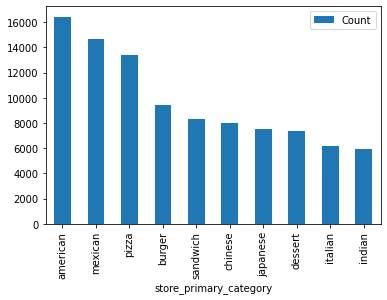

In [ ]:
## Top 10 store prime categories
data.plot.bar(x='store_primary_category',y='Count')

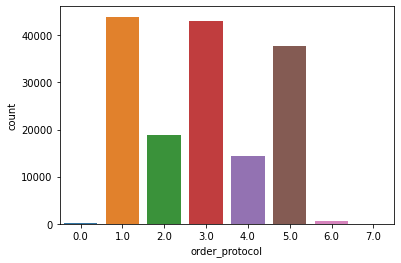

In [ ]:
## Majority of the orders placed by protocol 1
sns.countplot(df['order_protocol'])

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

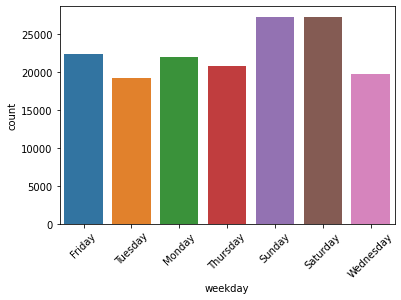

In [ ]:
## Orders were placed in large numbers on the weekends.
sns.countplot(df['weekday'])
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

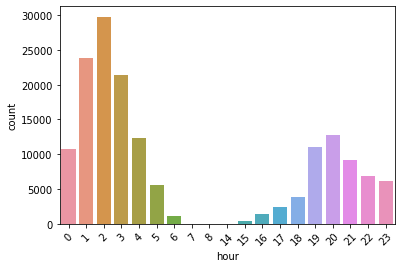

In [ ]:
## At 12 to 3 in the morning, there were a lot of orders, and there were fewer at midday.
sns.countplot(df['hour'])
plt.xticks(rotation=45)

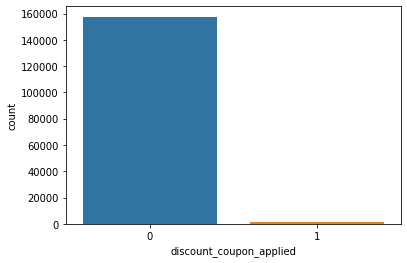

In [ ]:
## a relatively small number of orders have received discounts.
sns.countplot(df['discount_coupon_applied'])

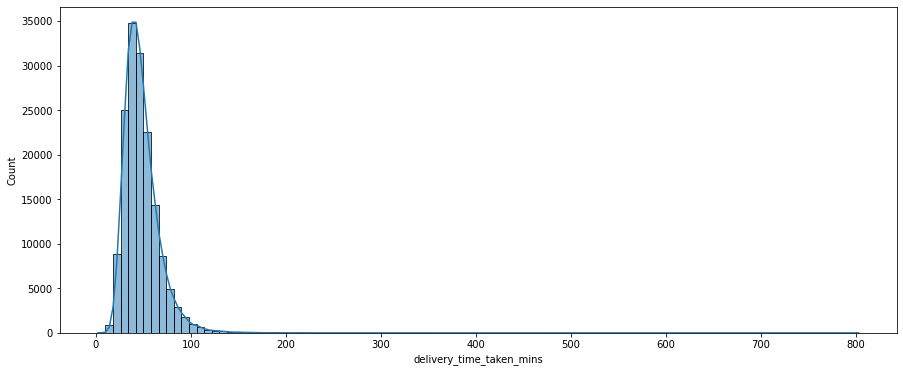

In [ ]:
## The majority of orders were delivered in 40 to 50 minutes.
plt.figure(figsize=(15,6))
sns.histplot(df['delivery_time_taken_mins'],kde=True,bins=100)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

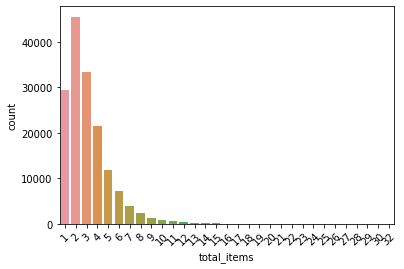

In [ ]:
## Majority of the orders contain 2 items
sns.countplot(df['total_items'])
plt.xticks(rotation=45)

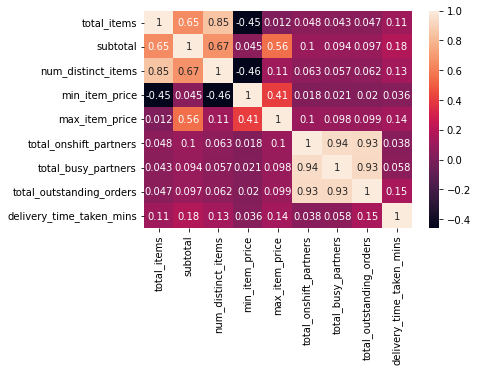

In [ ]:
## there is not any strong correlation between the delivery time and other features
sns.heatmap(df.corr(),annot=True)

In [ ]:
## The orders coming from market ID 1 took longer to deliver.
df.groupby('market_id')['delivery_time_taken_mins'].mean()

market_id
1.0    52.309044
2.0    46.208370
3.0    48.133550
4.0    47.425914
5.0    47.305568
6.0    48.141880
Name: delivery_time_taken_mins, dtype: float64

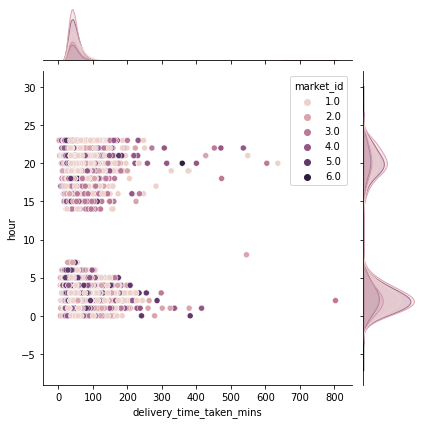

In [ ]:
## On average, orders ordered between 4pm and 9pm took longer to deliver.
sns.jointplot(data=df,x='delivery_time_taken_mins',y='hour',hue='market_id')

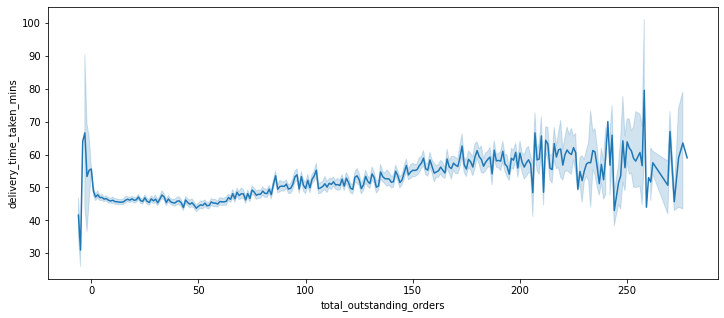

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(x='total_outstanding_orders',y='delivery_time_taken_mins',data=df)

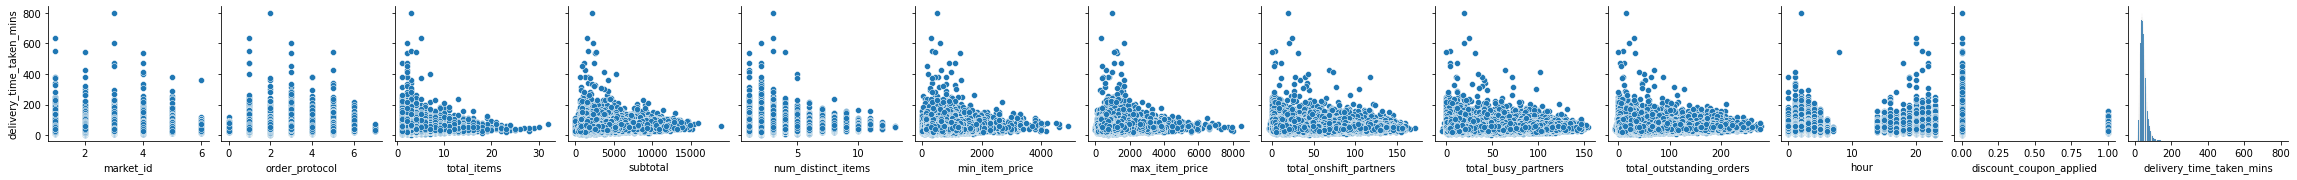

In [ ]:
sns.pairplot(df,y_vars=['delivery_time_taken_mins'])

In [ ]:
## Deliveries of orders for Japanese food took longer.
df.loc[df['store_primary_category'].isin(data['store_primary_category'])].groupby(['store_primary_category'])['delivery_time_taken_mins'].mean()

store_primary_category
american    48.688717
burger      47.480499
chinese     48.307068
dessert     49.277876
indian      49.535918
italian     50.627182
japanese    52.585243
mexican     44.598365
pizza       51.642361
sandwich    44.686286
Name: delivery_time_taken_mins, dtype: float64

## Categorical variables encoding(OHE)

In [ ]:
df=df.select_dtypes(exclude=['datetime64[ns]'])

In [ ]:
cols=df.columns

In [ ]:
cat_cols=df.select_dtypes(include=["object"]).columns

In [ ]:
cat_cols=list(filter(lambda x:x!='store_primary_category',cat_cols))

In [ ]:
df=pd.get_dummies(df,columns=cat_cols)

## Splitting train test data

In [ ]:
y=df['delivery_time_taken_mins']
X=df.drop('delivery_time_taken_mins',axis=1)

In [ ]:
X.columns

Index(['store_primary_category', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'market_id_1.0', 'market_id_2.0',
       'market_id_3.0', 'market_id_4.0', 'market_id_5.0', 'market_id_6.0',
       'order_protocol_0.0', 'order_protocol_1.0', 'order_protocol_2.0',
       'order_protocol_3.0', 'order_protocol_4.0', 'order_protocol_5.0',
       'order_protocol_6.0', 'order_protocol_7.0', 'weekday_Friday',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday', 'hour_0',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23',
       'discount_coupon_applied_0', 'discount_coupon_applied_1'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Target encoding for store_primary_category

In [ ]:
df1=X_train.copy()

In [ ]:
df1['target']=y_train

In [ ]:
target=df1.groupby('store_primary_category')['target'].mean().to_frame('mean').reset_index()

In [ ]:
arr=target.values.tolist()
obj={}
for i in arr:
    obj[i[0]]=i[1]

In [ ]:
X_train['store_primary_category']=X_train['store_primary_category'].apply(lambda x:obj[x])

In [ ]:
X_test['store_primary_category']=X_test['store_primary_category'].apply(lambda x:obj[x])

## Scaling

In [ ]:
train_cols=X_train.columns

In [ ]:
scaler = StandardScaler()   # I have not followed above discussion
scaler.fit(X_train)

StandardScaler()

In [ ]:
train_cols

Index(['store_primary_category', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders', 'market_id_1.0', 'market_id_2.0',
       'market_id_3.0', 'market_id_4.0', 'market_id_5.0', 'market_id_6.0',
       'order_protocol_0.0', 'order_protocol_1.0', 'order_protocol_2.0',
       'order_protocol_3.0', 'order_protocol_4.0', 'order_protocol_5.0',
       'order_protocol_6.0', 'order_protocol_7.0', 'weekday_Friday',
       'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday', 'hour_0',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23',
       'discount_coupon_applied_0', 'discount_coupon_applied_1'],
      dtype='object')

In [ ]:
x_train_scaled=scaler.transform(X_train)

In [ ]:
x_test_scaled=scaler.transform(X_test)

In [ ]:
y_train_mean=y_train.mean()
y_train_std=y_train.std()

In [ ]:
y_train_scaled=(y_train-y_train_mean)/y_train_std

In [ ]:
y_test_scaled=(y_test-y_train_mean)/y_train_std

In [ ]:
y_test_scaled

36156    -0.220355
8109      0.197776
145774   -0.063556
70826     0.354575
106730    0.197776
            ...   
6659     -1.317948
158737   -0.220355
136226    0.145509
10053    -0.168089
94583     0.040977
Name: delivery_time_taken_mins, Length: 31766, dtype: float64

## Modeling: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
rfr=RandomForestRegressor(random_state=42,n_estimators=300,max_depth=7)

In [ ]:
rfr.fit(x_train_scaled,y_train_scaled.values)

RandomForestRegressor(max_depth=7, n_estimators=300, random_state=42)

### Check accuracy score

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
def evaluate_metrics(y_pred_test):
    mse=mean_squared_error(y_test_scaled, y_pred_test)
    print("Mean squared error for test data is",mse)
    rmse=mse**0.5
    print("Root mean squared error for test data is",rmse)
    mape=np.mean(np.abs((y_test_scaled-y_pred_test)/y_test_scaled))
    print("Mean absolute precentage error for test data is",mape)

In [ ]:
y_pred_test = rfr.predict(x_test_scaled)
y_pred_test

array([0.31094557, 0.68584516, 0.40076547, ..., 0.10826747, 0.18048527,
       0.36336121])

In [ ]:
evaluate_metrics(y_pred_test)

Mean squared error for test data is 0.7634684128980168
Root mean squared error for test data is 0.873766795488371
Mean absolute precentage error for test data is 1.7556181512326254


## Modeling: Neural Networks

In [ ]:
#!pip install tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
seed = 42
tf.random.set_seed(seed)

### Neural Network - 1 hidden layer

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = x_train_scaled.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
history=NN_model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               6656      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 14,977
Trainable params: 14,977
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5'
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6)
callbacks_list = [es,checkpoint]

In [ ]:
#history=NN_model.fit(x_train_scaled, y_train.values, batch_size=32, validation_split = 0.2, callbacks=callbacks_list,verbose=False)
history=NN_model.fit(x_train_scaled, y_train_scaled.values, epochs=30, batch_size=150, verbose=1, validation_split=0.2)

Epoch 1/30
678/678 [==============================] - 2s 2ms/step - loss: 0.8179 - mse: 0.8179 - mae: 0.6222 - val_loss: 0.7617 - val_mse: 0.7617 - val_mae: 0.6175
Epoch 2/30
678/678 [==============================] - 1s 2ms/step - loss: 0.7658 - mse: 0.7658 - mae: 0.6000 - val_loss: 0.7352 - val_mse: 0.7352 - val_mae: 0.5951
Epoch 3/30
678/678 [==============================] - 1s 2ms/step - loss: 0.7580 - mse: 0.7580 - mae: 0.5965 - val_loss: 0.7329 - val_mse: 0.7329 - val_mae: 0.5928
Epoch 4/30
678/678 [==============================] - 1s 2ms/step - loss: 0.7613 - mse: 0.7613 - mae: 0.5939 - val_loss: 0.7381 - val_mse: 0.7381 - val_mae: 0.6056
Epoch 5/30
678/678 [==============================] - 1s 2ms/step - loss: 0.7527 - mse: 0.7527 - mae: 0.5926 - val_loss: 0.7315 - val_mse: 0.7315 - val_mae: 0.6023
Epoch 6/30
678/678 [==============================] - 1s 2ms/step - loss: 0.7443 - mse: 0.7443 - mae: 0.5909 - val_loss: 0.7314 - val_mse: 0.7314 - val_mae: 0.5878
Epoch 7/30
678/6

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


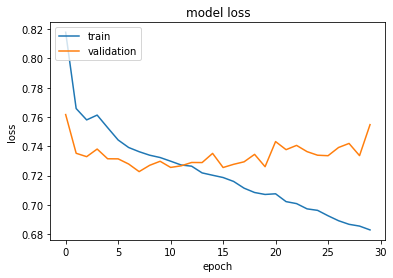

In [ ]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_pred_test=NN_model.predict(x_test_scaled)

993/993 [==============================] - 1s 926us/step


In [ ]:
y_pred_test1=y_pred_test.reshape((len(y_pred_test),))

In [ ]:
evaluate_metrics(y_pred_test1)

Mean squared error for test data is 0.6968115239490945
Root mean squared error for test data is 0.8347523728322637
Mean absolute precentage error for test data is 2.1030375200931983


## Neural Network - 2 Hidden Layers

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = x_train_scaled.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error','mean_squared_error'])
NN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               6656      
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 256)               16640     
                                                                 
 dense_6 (Dense)             (None, 1)                 257       
                                                                 
Total params: 31,809
Trainable params: 31,809
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=NN_model.fit(x_train_scaled, y_train_scaled.values, batch_size=32, validation_split = 0.2, callbacks=callbacks_list,verbose=False)


Epoch 1: val_loss improved from inf to 0.59880, saving model to Weights-001--0.59880.hdf5


In [ ]:
y_pred_test=NN_model.predict(x_test_scaled)

993/993 [==============================] - 1s 1ms/step


In [ ]:
y_pred_test1=y_pred_test.reshape((len(y_pred_test)))

In [ ]:
evaluate_metrics(y_pred_test1)

Mean squared error for test data is 0.7121220676599835
Root mean squared error for test data is 0.8438732533147283
Mean absolute precentage error for test data is 1.8436661338966343


## Neural Network - 3 Hidden Layers

In [ ]:
NN_model3 = Sequential()

# The Input Layer :
NN_model3.add(Dense(128, kernel_initializer='normal',input_dim = x_train_scaled.shape[1], activation='linear'))

# The Hidden Layers :
NN_model3.add(Dense(128, kernel_initializer='normal',activation='linear'))
NN_model3.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model3.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model3.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model3.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
NN_model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 128)               6656      
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 256)               33024     
                                                                 
 dense_10 (Dense)            (None, 256)               65792     
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 122,241
Trainable params: 122,241
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=NN_model3.fit(x_train_scaled, y_train_scaled.values, batch_size=32, validation_split = 0.2,epochs=30)

Epoch 1/30
3177/3177 [==============================] - 12s 4ms/step - loss: 0.8183 - accuracy: 0.0000e+00 - val_loss: 0.7828 - val_accuracy: 0.0000e+00
Epoch 2/30
3177/3177 [==============================] - 11s 3ms/step - loss: 0.8360 - accuracy: 0.0000e+00 - val_loss: 0.7504 - val_accuracy: 0.0000e+00
Epoch 3/30
3177/3177 [==============================] - 11s 4ms/step - loss: 0.7871 - accuracy: 0.0000e+00 - val_loss: 0.7473 - val_accuracy: 0.0000e+00
Epoch 4/30
3177/3177 [==============================] - 11s 4ms/step - loss: 0.7832 - accuracy: 0.0000e+00 - val_loss: 0.7498 - val_accuracy: 0.0000e+00
Epoch 5/30
3177/3177 [==============================] - 11s 4ms/step - loss: 0.7880 - accuracy: 0.0000e+00 - val_loss: 0.7643 - val_accuracy: 0.0000e+00
Epoch 6/30
3177/3177 [==============================] - 11s 4ms/step - loss: 0.7800 - accuracy: 0.0000e+00 - val_loss: 0.7420 - val_accuracy: 0.0000e+00
Epoch 7/30
3177/3177 [==============================] - 11s 3ms/step - loss: 0.771

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


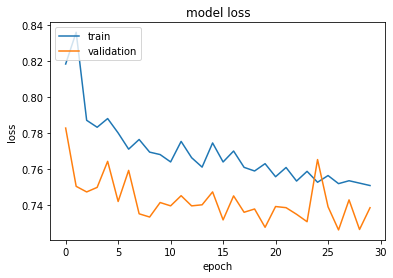

In [ ]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_pred_test=NN_model3.predict(x_test_scaled)

993/993 [==============================] - 2s 2ms/step


In [ ]:
y_pred_test1=y_pred_test.reshape((len(y_pred_test)))

In [ ]:
evaluate_metrics(y_pred_test1)

Mean squared error for test data is 0.6828410837358015
Root mean squared error for test data is 0.8263419895756245
Mean absolute precentage error for test data is 2.1836028955297637


## Questionnaire
### 1. Problem Statment
##### Porter needs to get an anticipated delivery time that it can give the consumers based on what they are ordering, where they are getting it from, and the delivery partners.

### 2. List 3 functions the pandas datetime provides with one line explanation.
#### dt.year, dt.month and dt.day are the inbuilt attributes to get year, month , and day from Pandas datetime object.

### 3. Short note on datetime, timedelta, time span (period)
#### datetime: module supplies classes to work with date and time.
#### timedelta: object represents a duration, the difference between two dates or times
#### timespan: allow to check if a timestamp falls within a specified list of boundaries

### 4. Why do we need to check for outliers in our data?
#### Outliers in input data can skew and mislead the training process of machine learning algorithms resulting in longer training times, less accurate models and ultimately poorer results

### 5. Name 3 outlier removal methods?
#### Unsupervised: Local Outlier Factor, DBScan, Isolation Forest, Elliptic Envelope

### 6. What classical machine learning methods can we use other than random forest for regression?
#### Linear Regression, Decision Tree, Support Vector Machine

### 7. Why is scaling required for neural networks?
#### In the case of neural networks, feature scaling benefits optimization by making the training faster. It prevents the optimization from getting stuck in local optima.

### 8. Briefly explain your choice of optimizer.
#### Used Adam Optimizer as it has faster computation time, and require fewer parameters for tuning.

### 9. Which activation function did you use and why?
#### ReLu results in a numerical value greater than 0


### 10. Why does a neural network perform well on a large dataset?
#### helps counter the neural network problem of high variance to a certain extent